# Explanatory Data Analysis (Olympic Games)

## Data Import and Inspection | Merging and Concatenating | Preparation

In [819]:
import pandas as pd
import numpy as np

In [820]:
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
dic= pd.read_csv('dictionary.csv')

In [821]:
winter['Edition'] = 'Winter'
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,Winter
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,Winter
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold,Winter


In [822]:
summer['Edition'] = 'Summer'
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer


In [823]:
olympics = pd.concat((summer,winter))
olympics

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Summer
...,...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,Winter
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,Winter
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Winter
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Winter


## Data Cleaning

In [824]:
olympics.loc[olympics.Country.isnull()]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,Summer
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,Summer
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,Summer
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,Summer


In [825]:
olympics.loc[(olympics.Country.isnull())&(olympics.Sport=='Wrestling'),'Country']='RUS'
#found these are attributed to Russia

In [826]:
olympics.drop(index=olympics.loc[olympics.Country.isnull()].index,inplace=True)
#Likely cases of doping. This removes the final missing values from our dataset

In [827]:
dic

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN
...,...,...,...,...
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014


In [828]:
#less memory/using for sorting
olympics.Medal = olympics.Medal.astype("category")

In [829]:
new = pd.merge(left = olympics,right=dic,left_on='Country',right_on='Code',how='left')
new.drop(columns=['Code','Population','GDP per Capita'],inplace=True)

In [830]:
new.rename(columns={'Country_x':'Code','Country_y':'Country'},inplace=True)

In [831]:
#dropping codes that don't belong to a country
new.drop(index=new.loc[new.Code=='ZZX'].index,inplace=True)

In [832]:
torep=pd.DataFrame.from_dict(data={'URS':'SovietUnion','GDR':'EastGermany','ROU':'Romania','FRG':'WestGermany','TCH':'Czechoslovakia','YUG':'Yugoslavia','EUN':'UnifiedTeam','EUA':'UnifiedTeamofGermany','ZZX':'Mixedteams','SRB':'Serbia','ANZ':'Australasia','RU1':'RussianEmpire','MNE':'Montenegro','TTO':'TrinidadandTobago','BOH':'Bohemia','BWI':'WestIndiesFederation','SGP':'Singapore','IOP':'IndependentOlympicParticipants'},orient='index').reset_index()
torep.rename(columns={'index':'code',0:'country'},inplace=True)
torep

,code,country
0,URS,SovietUnion
1,GDR,EastGermany
2,ROU,Romania
3,FRG,WestGermany
4,TCH,Czechoslovakia
5,YUG,Yugoslavia
6,EUN,UnifiedTeam
7,EUA,UnifiedTeamofGermany
8,ZZX,Mixedteams
9,SRB,Serbia


In [833]:
dicr={'URS':'SovietUnion','GDR':'EastGermany','ROU':'Romania','FRG':'WestGermany','TCH':'Czechoslovakia','YUG':'Yugoslavia','EUN':'UnifiedTeam','EUA':'UnifiedTeamofGermany','ZZX':'Mixedteams','SRB':'Serbia','ANZ':'Australasia','RU1':'RussianEmpire','MNE':'Montenegro','TTO':'TrinidadandTobago','BOH':'Bohemia','BWI':'WestIndiesFederation','SGP':'Singapore','IOP':'IndependentOlympicParticipants'}

In [834]:
new.loc[new.Code.isin(torep.code),'Country']=new['Code'].map(dicr)

In [835]:
new.Country.replace(to_replace='SovietUnion',value='Russia',inplace=True)

## What are the most successful countries of all time?

In [837]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,12)})
sns.set_style('white')

In [1338]:
new.Medal.cat.set_categories(["Bronze","Silver","Gold"],ordered=True)
new.sort_values('Medal',ascending=False)
#Sorting values

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,games
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,1896 Athens
18420,1988,Seoul,Athletics,Athletics,"JOYNER-KERSEE, Jackie",USA,Women,Long Jump,Gold,Summer,United States,1988 Seoul
18438,1988,Seoul,Athletics,Athletics,"MARKOV, Kristo Gantchev",BUL,Men,Triple Jump,Gold,Summer,Bulgaria,1988 Seoul
18435,1988,Seoul,Athletics,Athletics,"LISOVSKAYA, Natalya",URS,Women,Shot Put,Gold,Summer,Russia,1988 Seoul
18432,1988,Seoul,Athletics,Athletics,"TIMMERMANN, Ulf",GDR,Men,Shot Put,Gold,Summer,EastGermany,1988 Seoul
...,...,...,...,...,...,...,...,...,...,...,...,...
21852,1996,Atlanta,Basketball,Basketball,"EINIKIS, Gintaras",LTU,Men,Basketball,Bronze,Summer,Lithuania,1996 Atlanta
21853,1996,Atlanta,Basketball,Basketball,"JURKUNAS, Andrius",LTU,Men,Basketball,Bronze,Summer,Lithuania,1996 Atlanta
21854,1996,Atlanta,Basketball,Basketball,"KARNISOVAS, Arturas",LTU,Men,Basketball,Bronze,Summer,Lithuania,1996 Atlanta
21855,1996,Atlanta,Basketball,Basketball,"KURTINAITIS, Rimas",LTU,Men,Basketball,Bronze,Summer,Lithuania,1996 Atlanta


### Top 10 Countries

In [1336]:
top10.Medal=top10.Medal.astype("category")
top10 = new.loc[new.Country.isin(new.Country.value_counts().nlargest(10).index),:]
top10.sort_values(by="Medal",ascending=True,inplace=True)
top10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20305 entries, 16854 to 0
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        20305 non-null  int64   
 1   City        20305 non-null  object  
 2   Sport       20305 non-null  object  
 3   Discipline  20305 non-null  object  
 4   Athlete     20305 non-null  object  
 5   Code        20305 non-null  object  
 6   Gender      20305 non-null  object  
 7   Event       20305 non-null  object  
 8   Medal       20305 non-null  category
 9   Edition     20305 non-null  object  
 10  Country     20305 non-null  object  
 11  games       20305 non-null  object  
dtypes: category(1), int64(1), object(10)
memory usage: 1.9+ MB


C:\Users\charl.DESKTOP-E4F6RTP\AppData\Local\Temp\ipykernel_24076\2583353794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.Medal=top10.Medal.astype("category")
C:\Users\charl.DESKTOP-E4F6RTP\AppData\Local\Temp\ipykernel_24076\2583353794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.sort_values(by="Medal",ascending=True,inplace=True)


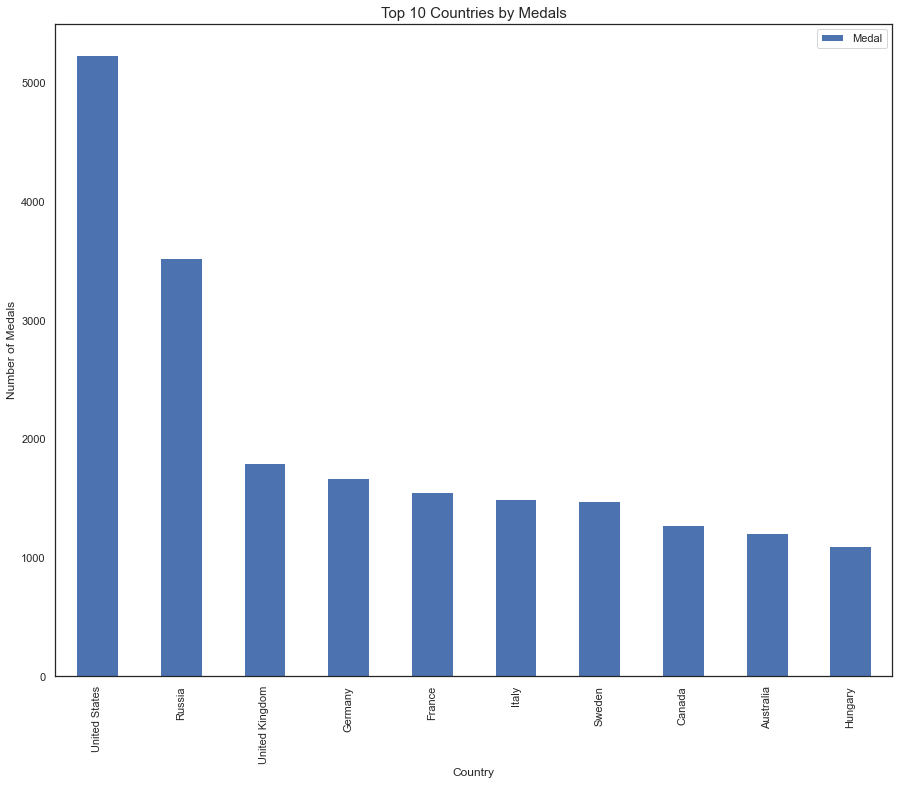

In [1337]:
pd.DataFrame(new.groupby(by='Country').Medal.count()).sort_values(by='Medal',ascending=False).nlargest(10,columns='Medal').plot(kind="bar")
plt.title("Top 10 Countries by Medals",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

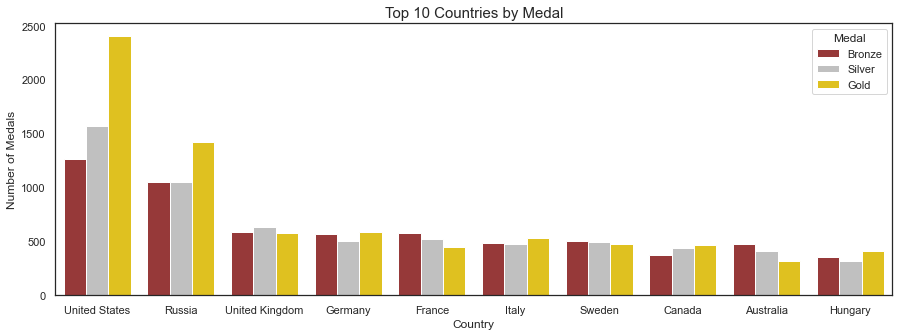

In [1342]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Country',hue='Medal',order=top10.Country.value_counts().index,palette=['brown','silver','gold'])
plt.title("Top 10 Countries by Medal",fontsize=15)
plt.ylabel("Number of Medals")
plt.show()

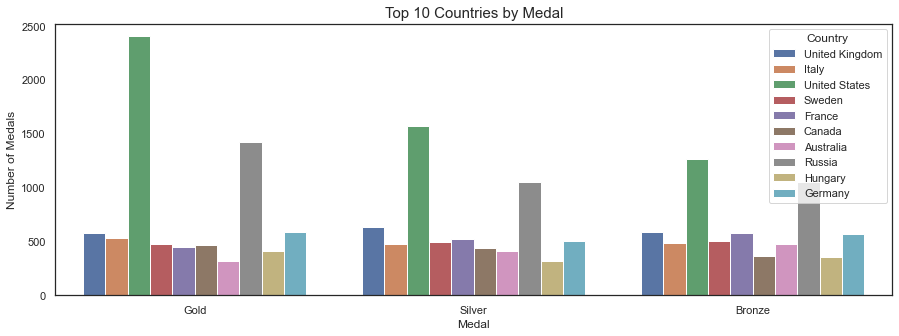

In [1343]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Medal',hue='Country',order=top10.Medal.value_counts().index)
plt.title("Top 10 Countries by Medal",fontsize=15)
plt.ylabel("Number of Medals")
plt.show()

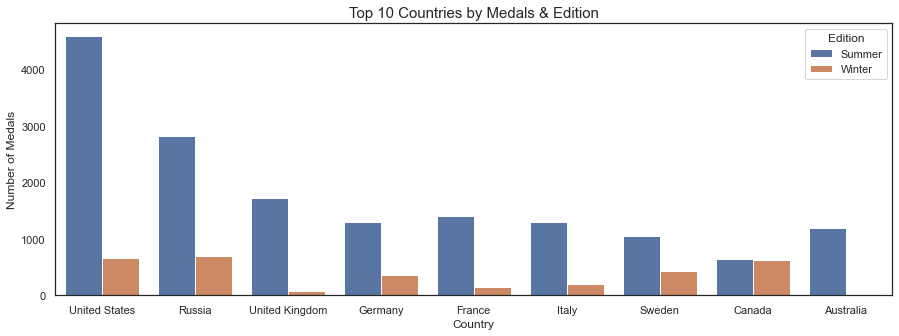

In [1344]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=new,x='Country',hue='Edition',order=new.Country.value_counts().iloc[:9].index)
plt.title("Top 10 Countries by Medals & Edition",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

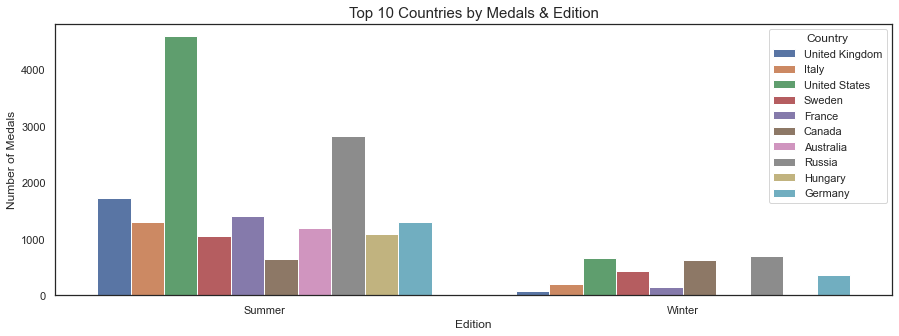

In [1345]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=top10,x='Edition',hue='Country')
plt.title("Top 10 Countries by Medals & Edition",fontsize = 15)
plt.ylabel("Number of Medals")
plt.show()

## Do GDP, Population and Politics matter?

## Aggregating and Ranking

In [845]:
#two ways of counting medals (crosstab | groupby)
medals_per_country = pd.crosstab(new.Country,new.Medal,margins=True,margins_name="total",normalize=False)
medals_per_country= medals_per_country.sort_values(by='total',ascending=False).iloc[1:,:]

In [846]:
aggregated = new.groupby(by=['Country','Medal']).Medal.count().unstack()

In [847]:
aggregated['Total'] = aggregated.sum(axis=1)

In [848]:
aggregated.sort_values(by="Total",ascending=False)

Medal,Bronze,Silver,Gold,Total
Country,,,,
United States,1265,1571,2402,5238
Russia,1047,1053,1421,3521
United Kingdom,587,632,580,1799
Germany,572,504,589,1665
France,578,526,444,1548
...,...,...,...,...
Tonga,0,1,0,1
Togo,1,0,0,1
Grenada,0,0,1,1


In [849]:
#calculating approximate number of games per country as participation metric
new['games']= new.apply(lambda x: str(x.Year)+ " " + x.City,axis=1)

In [850]:
games = pd.DataFrame(new.groupby("Country").apply(lambda x: x.games.nunique()).sort_values(ascending=False),columns=["Total games"])

In [851]:
df = pd.merge(left=aggregated,right=dic,on='Country').sort_values(by=['Gold','Silver','Bronze'],ascending=[False,False,False])

In [852]:
df['Rank']=df.Total.rank(ascending=False)

In [853]:
df = pd.merge(left=df,right=games,on='Country')

In [854]:
top50 = df.nsmallest(50,'Rank') 

In [855]:
df.corr(method='pearson').iloc[:,[0,1,2,3,4,5,7]]

,Bronze,Silver,Gold,Total,Population,GDP per Capita,Total games
Bronze,1.000000,0.982158,0.930618,0.979885,0.176191,0.412534,0.787653
Silver,0.982158,1.000000,0.968554,0.995770,0.200721,0.410454,0.753370
Gold,0.930618,0.968554,1.000000,0.983748,0.216831,0.329198,0.621176
Total,0.979885,0.995770,0.983748,1.000000,0.202935,0.383474,0.719736
Population,0.176191,0.200721,0.216831,0.202935,1.000000,-0.089976,0.128863
GDP per Capita,0.412534,0.410454,0.329198,0.383474,-0.089976,1.000000,0.554806
Rank,-0.631719,-0.593460,-0.483969,-0.568062,-0.243625,-0.364988,-0.822373
Total games,0.787653,0.753370,0.621176,0.719736,0.128863,0.554806,1.000000


In [857]:
df.corr(method='spearman').loc['Rank',:].sort_values()
#Spearman p is typicaly used for ranks

Total            -1.000000
Total games      -0.963110
Bronze           -0.954402
Silver           -0.953239
Gold             -0.931634
GDP per Capita   -0.453150
Population       -0.424159
Rank              1.000000
Name: Rank, dtype: float64

## Statistical Analysis and Hypothesis Testing with scipy

In [858]:
top50.drop(columns=['Rank','Bronze','Silver','Gold'],inplace=True)

In [859]:
df.rename(columns={'Total':'Total Medals'},inplace=True)

In [860]:
top50.rename(columns={'Total':'Total Medals'},inplace=True)

In [861]:
top50.set_index('Country',inplace=True)

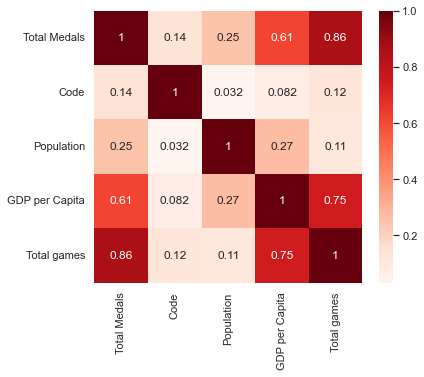

In [1295]:
plt.figure(figsize=(6,5))
sns.heatmap(top50.rank(ascending=False).corr(method='spearman').abs(),annot=True,cmap='Reds')
plt.show()

### Null Hypothesis 1 = There is no relationship between total medals and population

In [481]:
import scipy.stats as stats

In [502]:
df.head()

,Country,Total Medals,Code,Population,GDP per Capita,Total games
0,United States,5238,USA,321418820.0,56115.718426,48
1,Russia,3521,RUS,144096812.0,9092.580536,29
2,Germany,1665,GER,81413145.0,41313.313995,25
3,United Kingdom,1799,GBR,65138232.0,43875.969614,42
4,Italy,1488,ITA,60802085.0,29957.804315,43


In [501]:
r,p_value = stats.spearmanr(df['Total Medals'],df.Population,nan_policy="omit")
print(r,p_value)

0.42415898019022863 6.057744236483611e-07


## The larger the country means a higher probability for more medals

### Reject null hypothesis -> there is a significant (positive) relationship between Total Medals and population

# hypothesis 2: there is no relationship between total medals and GDP per capita

In [505]:
r,p_value=(stats.spearmanr(df['Total Medals'],df['GDP per Capita'],nan_policy="omit"))
print(r,p_value)

0.45315012364048873 2.280256661027653e-07


### Reject Hypothesis 2 -> significant positive correlation between Total medals and GDP per capita. The richer a country, the higher probability for more medals

## hypothesis 3: there is no relationship between participation and total medal

In [863]:
r,pvalue = stats.spearmanr(df['Total Medals'],df['Total games'],nan_policy="omit")
print(r,p_value)

0.9631097111061669 2.280256661027653e-07


# reject hypothesis 3, there is a high correlation between participation and total medals

In [864]:
countryedition = pd.crosstab(new.Country,new.Edition)

In [865]:
menvswomen = pd.crosstab(new.Country,new.Gender)

In [866]:
comp = pd.merge(left=countryedition,right=menvswomen,on='Country')

In [867]:
comp['total'] = comp.sum(numeric_only=True,axis=1)

In [868]:
comp.sort_values(by='total',ascending=False,inplace=True)

In [869]:
ranks=comp.rank(method='average',ascending=False).head(50)

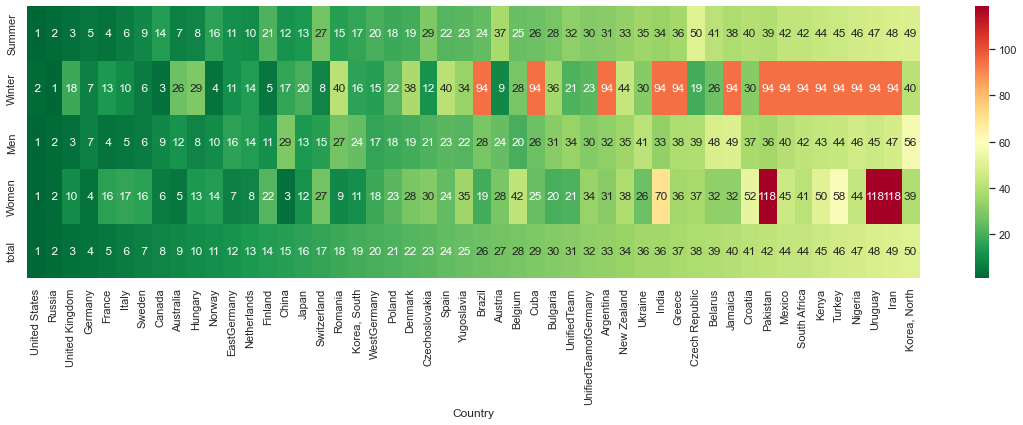

In [1348]:
plt.figure(figsize=(20,5))
sns.heatmap(ranks.T,cmap="RdYlGn_r",annot=True,fmt='2.0f')
plt.show()

## Most succesful countries in the Summer

In [985]:
#most succesful teams in the summer
pd.DataFrame(comp.sort_values(by='Summer',ascending=False).head(10)['Summer'])

,Summer
Country,
United States,4585
Russia,2818
United Kingdom,1720
France,1396
Germany,1305
Italy,1296
Australia,1189
Hungary,1079
Sweden,1044


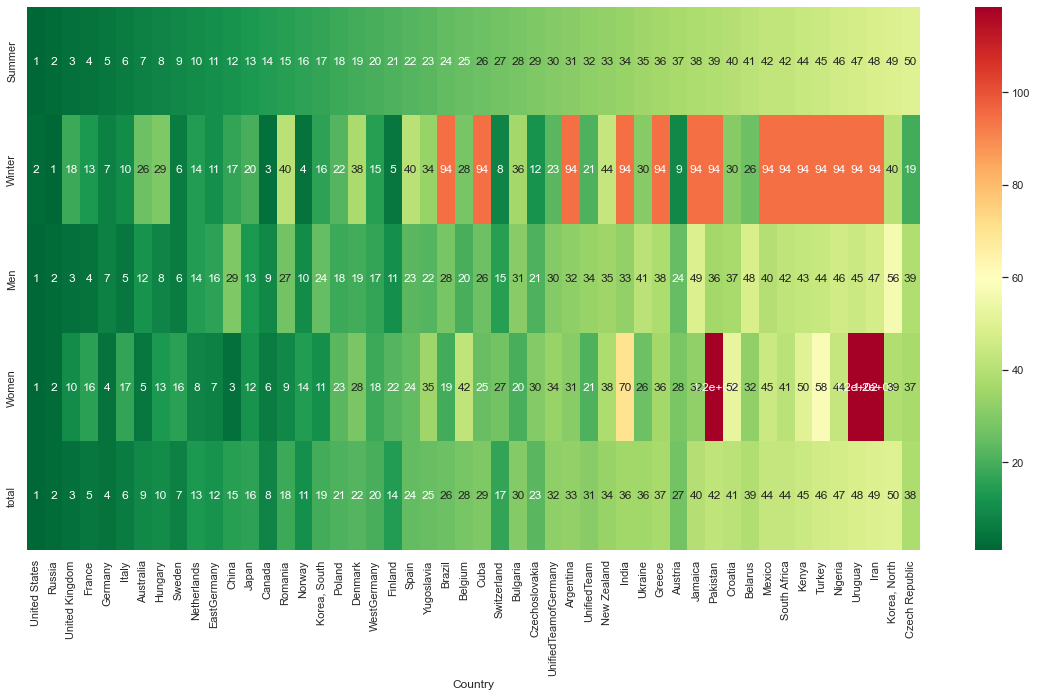

In [1349]:
#most succesful in summer right to left
plt.figure(figsize=(20,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Summer').head(50).T),annot=True,cmap='RdYlGn_r')
plt.show()

In [986]:
df.reset_index(inplace=True)

In [987]:
best_summer=df.loc[df.Country.isin(comp.sort_values(by='Summer',ascending=False).head(10).index)].set_index('Country')

In [988]:
#using top 50 countries
best_summer=pd.merge(left=best_summer,right=pd.DataFrame(comp.sort_values(by='Summer',ascending=False).head(50)['Summer']),on='Country')

In [997]:
#correlations (spearman)
best_summer.rank(method='average',ascending=False).sort_values(by='Summer',ascending=True).corr(method='spearman').iloc[[4,6,7,8,9],[9]]

,Summer
Total Medals,0.951515
Population,0.915152
GDP per Capita,-0.163636
Total games,0.121581
Summer,1.000000


## Number of people in a country is the most important factor in our dataset to more olympic summer medals. Countries with most total medals are very likely to have more summer medals.

# Most succesful countries in the winter

In [1094]:
#most succesful teams in the winter
pd.DataFrame(comp.sort_values(by='Winter',ascending=False).head(10)['Winter'])

,Winter
Country,
Russia,703
United States,653
Canada,625
Norway,457
Finland,434
Sweden,433
Germany,360
Switzerland,285
Austria,280


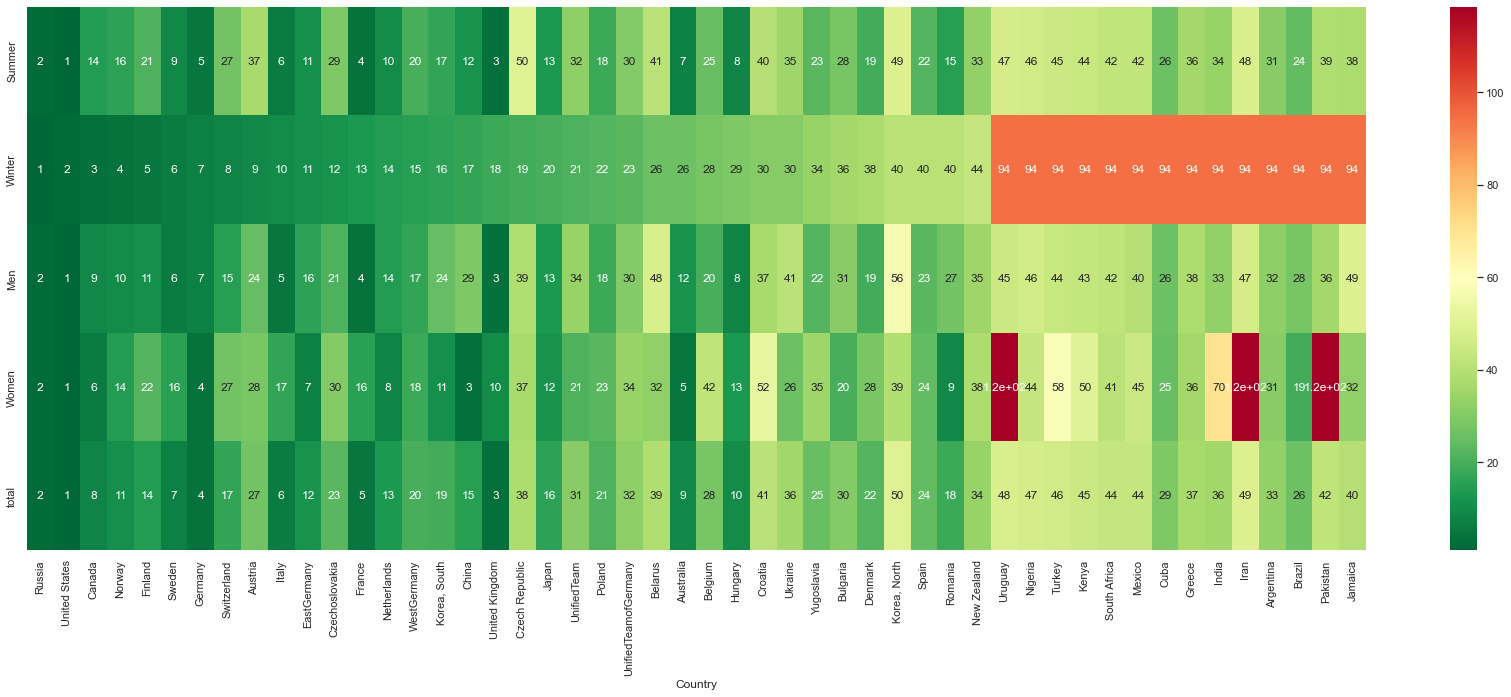

In [1034]:
#most succesful winter countries left to right
plt.figure(figsize=(30,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Winter').head(50).T),annot=True,cmap='RdYlGn_r')
plt.show()

In [975]:
best_winter=df.loc[df.Country.isin(comp.sort_values(by='Winter',ascending=False).head(10).index)].set_index('Country')

In [978]:
#using top 50 countries
best_winter=pd.merge(left=best_winter,right=pd.DataFrame(comp.sort_values(by='Winter',ascending=False).head(50)['Winter']),on='Country')

In [1002]:
best_winter.rank(method='average',ascending=False).sort_values(by='Winter',ascending=True).corr(method='spearman').loc[['Total Medals','Total games','Population','GDP per Capita'],'Winter']

Total Medals      0.490909
Total games       0.233874
Population        0.309091
GDP per Capita   -0.030303
Name: Winter, dtype: float64

## total population is an important factor for a country's number of winter medals. Participation is more important than in the summer medals and there is no correlation between how rich a country is and the number of winter medals within the top50 countries.

##### Identifying summer vs winter countries in the top 50

In [1089]:
editionrank=pd.DataFrame(ranks.Summer-ranks.Winter)

In [1090]:
editionrank.rename(columns={0:'rank'},inplace=True)

## Does geography matter?

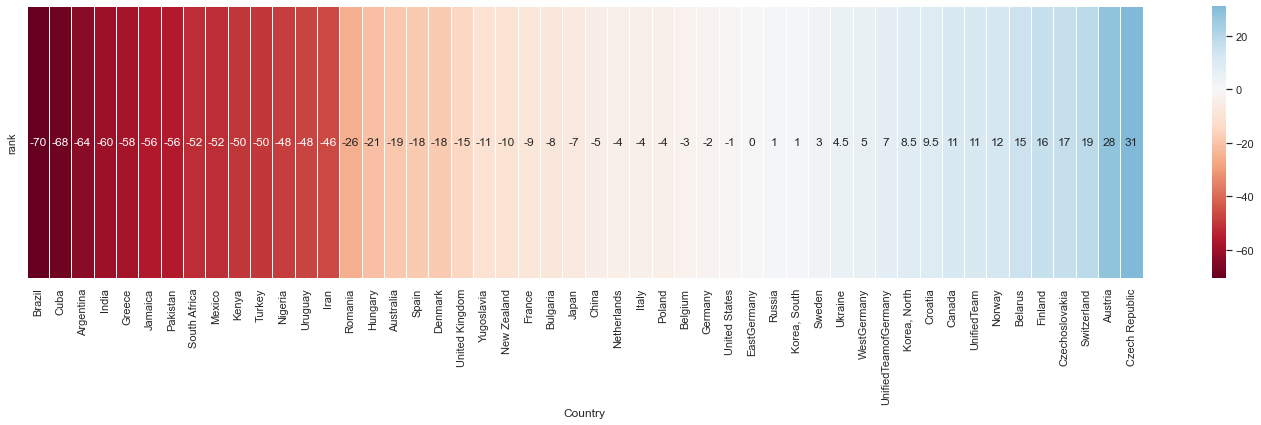

In [1286]:
#here we substract the ranks to determine which are the 'summer' countries, and which are the 'winter countries'
plt.figure(figsize=(25,5))
sns.heatmap(editionrank.sort_values(by='rank').T,cmap='RdBu',annot=True,center=0,linewidths=1)
plt.show()

### Countries lacking cold weather or mountains are more likely to be summer countries and vice versa. Geographical and climatic diversity are also key components in determining a countries overall olympic success.

## Do Traditions matter?

#### Most succesful men countries

In [1128]:
menvswomen.sort_values(by=['Men','Women'],ascending=[False,False])

Gender,Men,Women,total
Country,,,
United States,3618,1620,5238.0
Russia,2374,1147,3521.0
United Kingdom,1470,329,1799.0
France,1351,197,1548.0
Italy,1292,196,1488.0
...,...,...,...
Zimbabwe,0,23,23.0
Montenegro,0,14,14.0
Costa Rica,0,4,4.0


## Most succesful women countries


In [1129]:
menvswomen.sort_values(by=['Women','Men'],ascending=[False,False])

Gender,Men,Women,total
Country,,,
United States,3618,1620,5238.0
Russia,2374,1147,3521.0
China,298,591,889.0
Germany,1119,546,1665.0
Australia,704,500,1204.0
...,...,...,...
Sudan,1,0,1.0
Togo,1,0,1.0
Tonga,1,0,1.0


In [1123]:
menvswomen['total'] = menvswomen.sum(numeric_only=True,axis=1)

## Which are the 'women countries', and 'men countries'?

In [1139]:
mvwranks= menvswomen.rank(ascending=False,method='average').sort_values(by=['Women','Men'],ascending=[True,True])

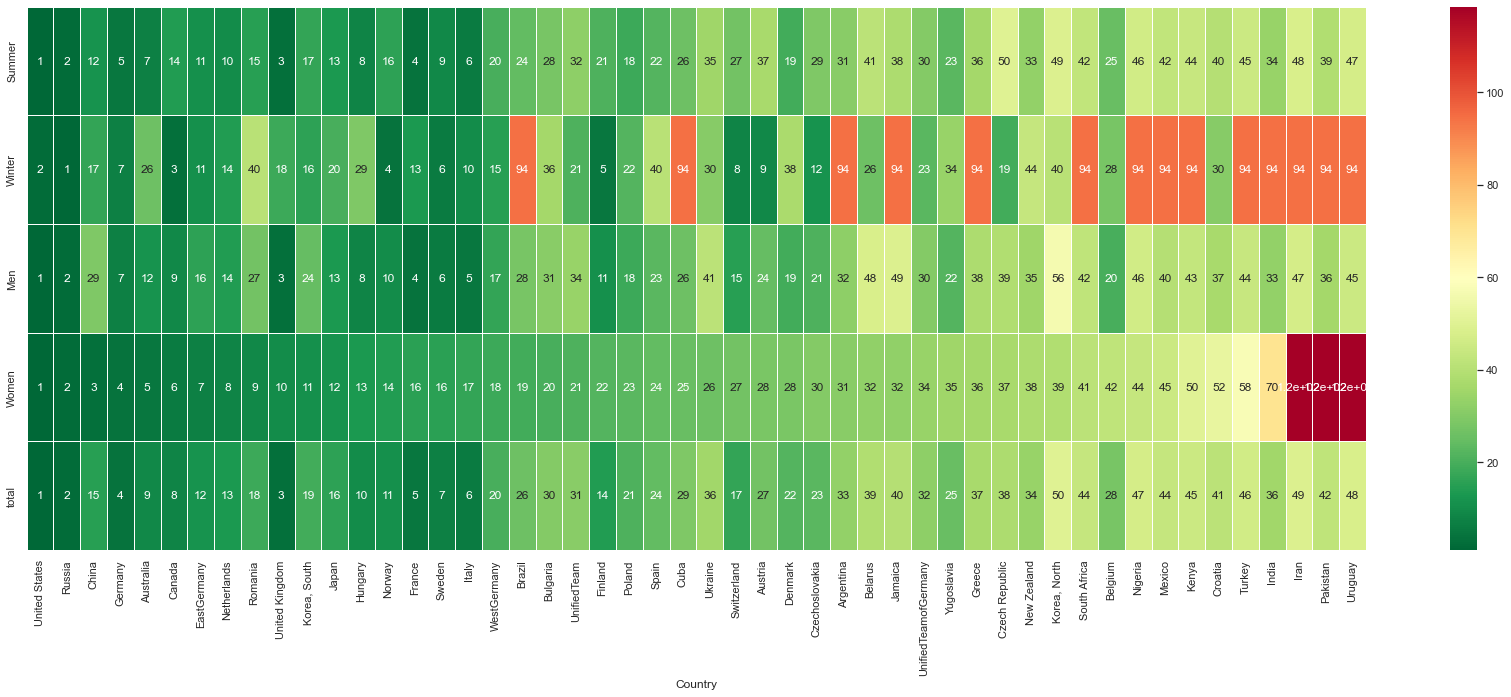

In [1280]:
#most succesful countries left to right
plt.figure(figsize=(30,10))
sns.heatmap(pd.DataFrame(ranks.sort_values(by='Women').head(50).T),annot=True,cmap='RdYlGn_r',linewidths=1)
plt.show()

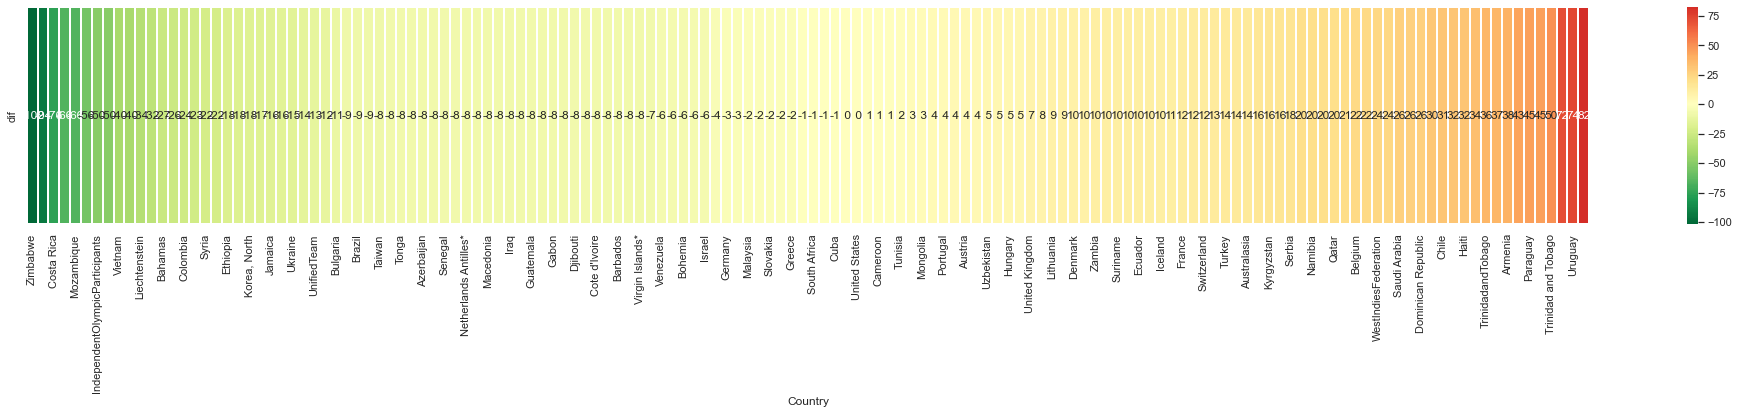

In [1290]:
#female countries on left, male countries on right
plt.figure(figsize=(35,4))
sns.heatmap(data=pd.DataFrame(mvwranks.Women-mvwranks.Men,columns=['dif']).sort_values('dif').T,linewidths=2,center=0,cmap='RdYlGn_r',fmt='2.0f',annot=True)
plt.show()

### Equality and effort put into both genders contribute significantly to overall olympic success

Create the following __Seaborn Heatmap__ that shows the __Ranks__ of Top 50 Countries __by Sports__. <br>
Identify traditional Sports / National Sports for e.g. UK and China!

## Does culture matter?

#### Countries that are good in core sports like aquatics, athletics and rowing, or sports that have been around for a long time are more likely to be more succesful

In [1311]:
pd.options.display.max_rows=10
pd.DataFrame(new.Sport.value_counts())

,Sport
Aquatics,4170
Athletics,3627
Rowing,2664
Gymnastics,2307
Skiing,1781
...,...
Croquet,8
Water Motorsports,5
Basque Pelota,4
Roque,3


In [1320]:
by_sport = pd.crosstab(new.Country,new.Sport)

In [1322]:
sportrank= by_sport.rank(ascending=False)

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,100.0,83.0,121.0,77.5,75.5,82.0,73.5,83.5,79.5,111.0,...,74.5,78.5,19.5,89.5,78.5,75.5,85.0,73.5,102.5,102.0
Algeria,100.0,83.0,46.0,77.5,75.5,82.0,73.5,83.5,79.5,34.0,...,74.5,78.5,89.0,89.5,78.5,75.5,85.0,73.5,102.5,102.0
Argentina,40.0,83.0,52.5,77.5,75.5,10.5,73.5,83.5,79.5,8.0,...,74.5,78.5,28.0,11.0,78.5,75.5,16.0,73.5,44.5,102.0
Armenia,100.0,83.0,121.0,77.5,75.5,82.0,73.5,83.5,79.5,69.5,...,74.5,78.5,89.0,89.5,78.5,75.5,85.0,73.5,34.5,39.0
Australasia,29.5,83.0,87.0,77.5,75.5,82.0,73.5,83.5,79.5,69.5,...,74.5,78.5,89.0,30.0,78.5,75.5,85.0,73.5,102.5,102.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WestGermany,17.0,83.0,15.0,77.5,75.5,82.0,73.5,8.0,7.5,34.0,...,74.5,78.5,89.0,20.0,78.5,75.5,85.0,73.5,27.5,31.0
WestIndiesFederation,100.0,83.0,52.5,77.5,75.5,82.0,73.5,83.5,79.5,111.0,...,74.5,78.5,89.0,89.5,78.5,75.5,85.0,73.5,102.5,102.0
Yugoslavia,15.0,83.0,69.0,77.5,75.5,3.0,73.5,83.5,79.5,24.5,...,74.5,5.5,89.0,89.5,78.5,75.5,11.0,73.5,102.5,19.0


In [1323]:
Sport = pd.DataFrame(new.groupby(['Country','Sport']).Sport.count()).unstack().fillna(0)

In [1324]:
Sport['total']= Sport.sum(axis=1)

In [1325]:
sporttop50=Sport.sort_values(by='total',ascending=False).head(50)

In [1326]:
sport50rank = sporttop50.iloc[:,:-1].rank(ascending=False,method='average')

## Best countries by sport

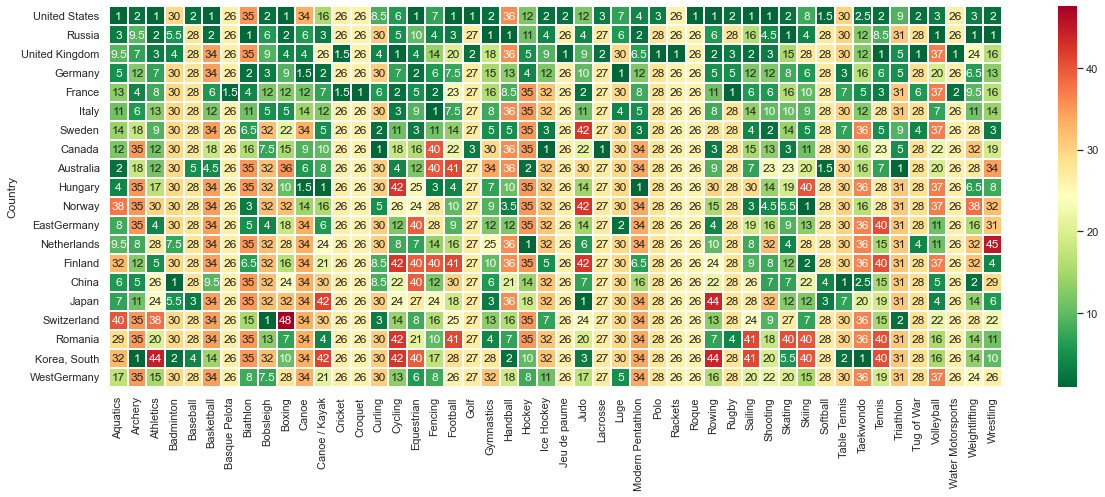

In [1350]:
#top 50 countries and which sports they excel in
plt.figure(figsize=(20,7))
sns.heatmap(sport50rank.droplevel(0, axis="columns").rename_axis(columns=None).reset_index().set_index('Country').head(20),linewidths=1.5,annot=True,cmap='RdYlGn_r')
plt.show()

## Lets only consider top 6 countries per sport to see if there are any traditional factors in play

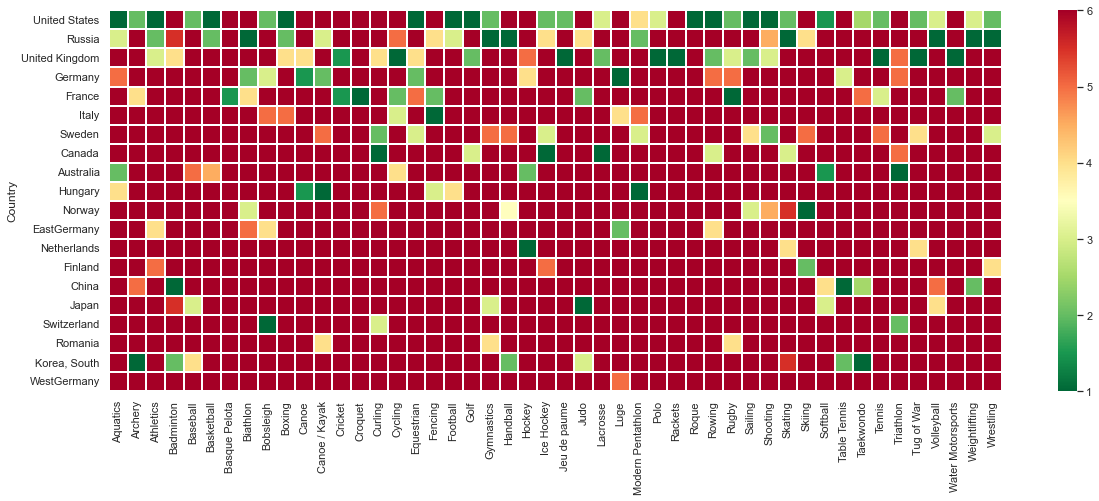

In [1352]:
#top 50 countries and which sports they excel in
plt.figure(figsize=(20,7))
sns.heatmap(sport50rank.droplevel(0, axis="columns").rename_axis(columns=None).reset_index().set_index('Country').head(20),linewidths=1.5,cmap='RdYlGn_r',vmin=1,vmax=6)
plt.show()

#### The United States is the top country in the core sports, explaining part of its great success. 
#### United Kingdom for example heavily favors sports: Polo, shooting, cycling, Lacrosse, tennis, tug of war but no tradition in core sports like aquatics, gymnastics or skiing. These are not traditional sports in the UK.
#### China also does not favor core sports like aquatics. Instead favoring badminton, table tennis & taekwondo

# The end

In [ ]:
{'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}